![image info](https://drive.google.com/uc?id=1AerT9299ijreLjEeIoGLv6SoT-SFC6-m)

# Inhaltsverzeichnis 

- **Aufgabe (Datensatz analysieren)**
- **Vorbearbeitung der Daten**
    - **Aufgabe 1: Überblick gewinnen**
- **Visualisierung der Daten**
    - **Aufgabe 2: Verteilung eines Features plotten I**
    - **Aufgabe 3:  Verteilung eines Features plotten II**
    - **Aufgabe 4: Zusätzliche Features plotten**
- **Machine Learning**
    - **Aufgabe 6: Daten extrahieren**
    - **Aufgabe 7:  Häufigkeiten plotten**
    - **Aufgabe 8: Daten splitten**
    - **Aufgabe 9: SVM trainieren**
    - **Aufgabe 10: Genauigkeit des Modells berechnen**
    - **Aufgabe 11: Confusion Matrix**
    - **Aufgabe 12: Confusion Matrix II**


# Aufgabe (Datensatz analysieren)

In dieser Aufgabe soll ein Datensatz über [Brustkrebs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) analysiert werden. Es soll ein **SVM**-Klassifikator trainiert werden, der gutartige von bösartigen Tumoren möglichst zuverlässig unterscheiden kann. Wie gewohnt importieren wir die notwendigen Bibliotheken und importieren die Daten von `sklearn`:

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

# Vorbearbeitung der Daten

In [4]:
dataset = load_breast_cancer()
df = pd.DataFrame(data=dataset.data)

## Aufgabe 1: Überblick gewinnen

Wir wollen einen Überblick über die Daten in `dataset` bekommen. Versuche die folgenden Fragen durch die Attribute von `dataset` zu beantworten.

- Wieviele Samples befinden sich im Datensatz? 
- Wieviele Features hat ein Sample? Wie ist der Name der Features?
- Wieviele Klassen befinden sich im Datensatz? Wie werden diese Klassen bezeichnet?
- Lies dir über den Schlüssel DESCR die Informationen über die Features durch um ein Gefühl für die Daten zu bekommen.

In [17]:
# Dein Code hier 

print(dataset.keys())
print(dataset.data.shape) ## 569 samples, 30 features
print(dataset.feature_names) ## s.Tabelle
print(dataset.DESCR) ##  - WDBC-MalignantM , WDBC-Benign - insgesamt 2 Klassen - bösartige und gutartige Tumore?



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from c

Damit die Daten visuell schön dargestellt werden können, empfiehlt es sich, sie in ein Pandas `DataFrame` umzuwandeln. Dies wird in der nächsten Zelle erledigt:

In [18]:
d = np.hstack([dataset.data,dataset.target.reshape(-1,1)])  # Verbindet Features mit Target
feature_names = list(dataset.feature_names)
feature_names.append("target")
print(dataset.data.shape)
df = pd.DataFrame(d,columns=feature_names)
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


Die Features und das Klassenlabel (`target`) wurden in einem großen `Dataframe df` kombiniert. Darüber können wir nun einfach die Daten visualisieren.


# Visualisierung der Daten

## Aufgabe 2: Verteilung eines Features plotten I

- Verwende die Funktion [displot](https://seaborn.pydata.org/generated/seaborn.displot.html) aus `seaborn` um die Verteilung des Features `mean radius` anzeigen zu lassen.  Was können wir im Schaubild erkennen? Was sagt das Feature `mean raidus` aus?

D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


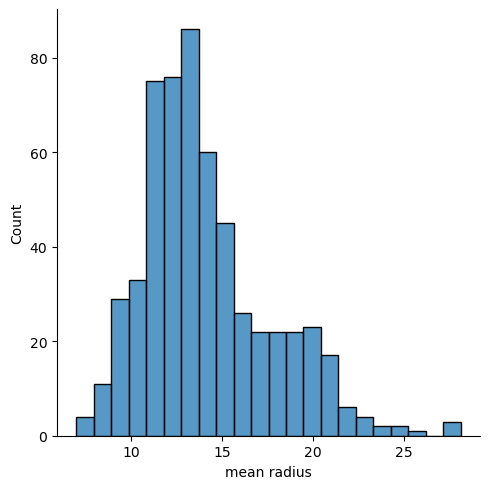

In [27]:
import seaborn as sns

sns.displot(data=df, x="mean radius")

## Ist nicht normalverteilt, sondern rechtsschief mit hohen Werten bei  10 <meanradius <15, also könnte man sagen, dass die meisten gemessenen 
## Zellkerne der Messungen einen durchschnittlichen Radius zwischen 10 und 15 Punkten auf dem Perimeter haben, einige Werte allerdings deutlich über 
## diesem Wert liegen. Das könnten eben die sein, bei denen bösartige Tumore bestehen.

## Aufgabe 3:  Verteilung eines Features plotten II

- Führe nun obigen Befehl nochmals aus, nur diesmal zusätzlich mit dem Parameter `hue="target"`. Dadurch werden die zwei verschiedenen Klassen (gutartig und bösartig) visuell unterschieden. Was lässt sich jetzt aus dem Schaubild herauslesen? Bestätigt dies unsere Intuition?




D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

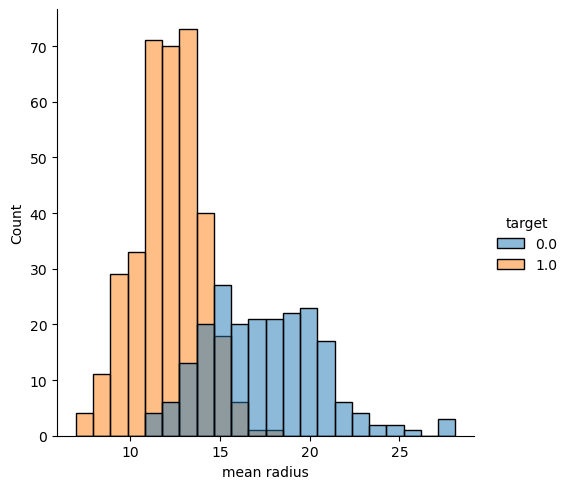

In [28]:
# Dein Code hier

sns.displot(data=df, x="mean radius", hue="target")

## Ja. Die meisten bösartigen Tumorzellen (target=0.0) haben einen größeren durchschnittlichen Zellkernradius.


## Aufgabe 4: Zusätzliche Features plotten 

- Plotte dir zur Übung noch andere Features auf die obige Art und Weise.

D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Users\janni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

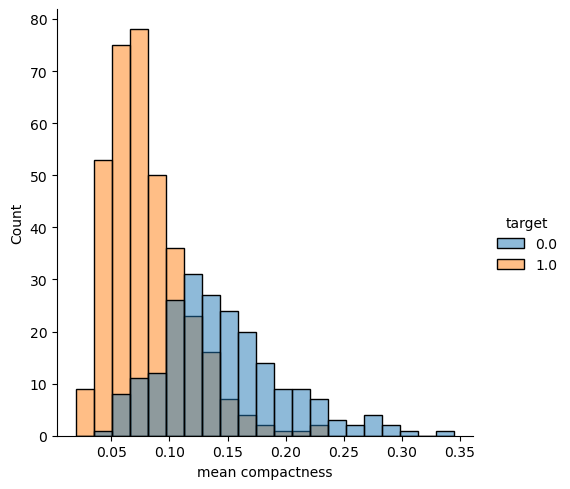

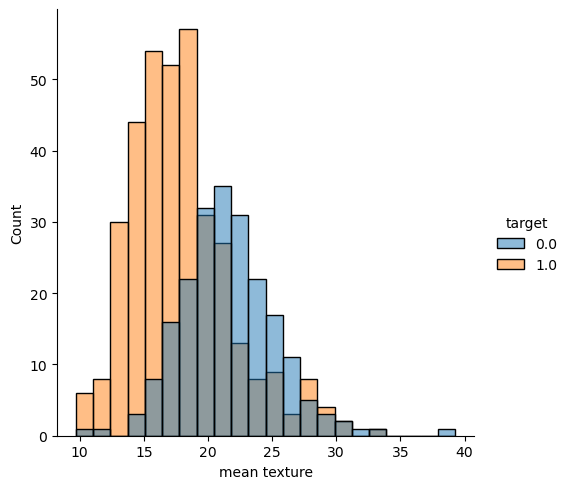

In [31]:

sns.displot(data=df, x="mean compactness", hue="target")
sns.displot(data=df, x="mean texture", hue="target")

# Machine Learning

Wir wollen nun ein Modell auf den Daten trainieren, was geeignet ist, ausgehend von den Features Vorhersagen über die Art des Tumors treffen zu können. Dazu müssen wir die Features und Klassen in verschiedenen Variablen speichern.

## Aufgabe 6: Daten extrahieren

- Definiere eine Array `X`, welches die Datenpunkte enthält und ein Array `y` welches die Klassen enthält. Verwende dafür die oben definierte Variable `dataset` oder `DataFrame`. 

In [43]:
#Dein Code hier

X = np.array(df['mean radius'].values)
y = np.array(df['target'].values)

print(X.shape)
print(y.shape)

(569,)
(569,)


## Aufgabe 7:  Häufigkeiten plotten

- Plotte die Häufigkeit der verschiedenen Klassen in `y` gegeneinander. Welche Klasse kommt häufiger vor?
(Verwende dazu z.b. die Methode [`plt.hist`](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html) zur Darstellung eines Histogramms.

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

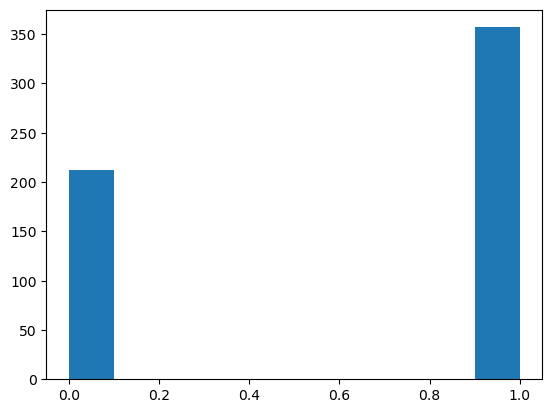

In [45]:
import matplotlib.pyplot as plt

plt.hist(y) ## Klasse "Benign" oder "Gutartig" - Das weiß man aber aus dataset.DESCR

print(dataset.DESCR)
#Dein Code hier

## Aufgabe 8: Daten splitten

- Splitte die Daten `X` und `y` in einen Trainingsdatensatz `X_train`, `y_train` und einen Testdatensatz `X_test`, `y_test`. Das Verhältnis soll 80:20 sein.

In [68]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=20)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

print(f"Trainingsdatensatz Shape:{X_train.shape}")
print(f"Testdatensatz Shape:{X_test.shape}")




Trainingsdatensatz Shape:(455, 1)
Testdatensatz Shape:(114, 1)


## Aufgabe 9: SVM trainieren

- Trainere einen **SVM**-Klassifikator auf den Trainingsdaten.

In [66]:
from sklearn.svm import SVC
clf = SVC()

# Dein Code hier

clf.fit(X_train,y_train)

predictions = clf.predict(X_test)


## Aufgabe 10: Genauigkeit des Modells berechnen

- Berechne die Genauigkeit (`score()`) des Modells auf den Test- und Trainingsdaten.

In [67]:
# Dein Code hier

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8769230769230769
0.9122807017543859


## Aufgabe 11: Confusion Matrix 

- Lasse dir die Confusion Matrix für die Testdaten anzeigen. Verwende dazu den Befehl `confusion_matrix` aus dem Modul `sklearn.metrics`.

In [61]:
from sklearn.metrics import confusion_matrix

In [70]:
print(confusion_matrix(y_test,predictions))
c = confusion_matrix(predictions,y_test)
c

[[38 10]
 [ 0 66]]


array([[38,  0],
       [10, 66]], dtype=int64)

## Aufgabe 12: Confusion Matrix II

- Lass dir die obige Confusion Matrix auf eine schönere Weise durch die Verwendung von `sns.heatmap(...)` darstellen. Vergleiche dazu das Notebook von SVM zum MNIST-Datensatz.

<Axes: >

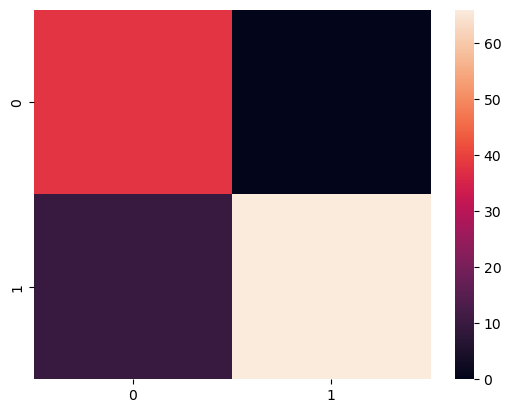

In [72]:
s=sns.heatmap(c)
s

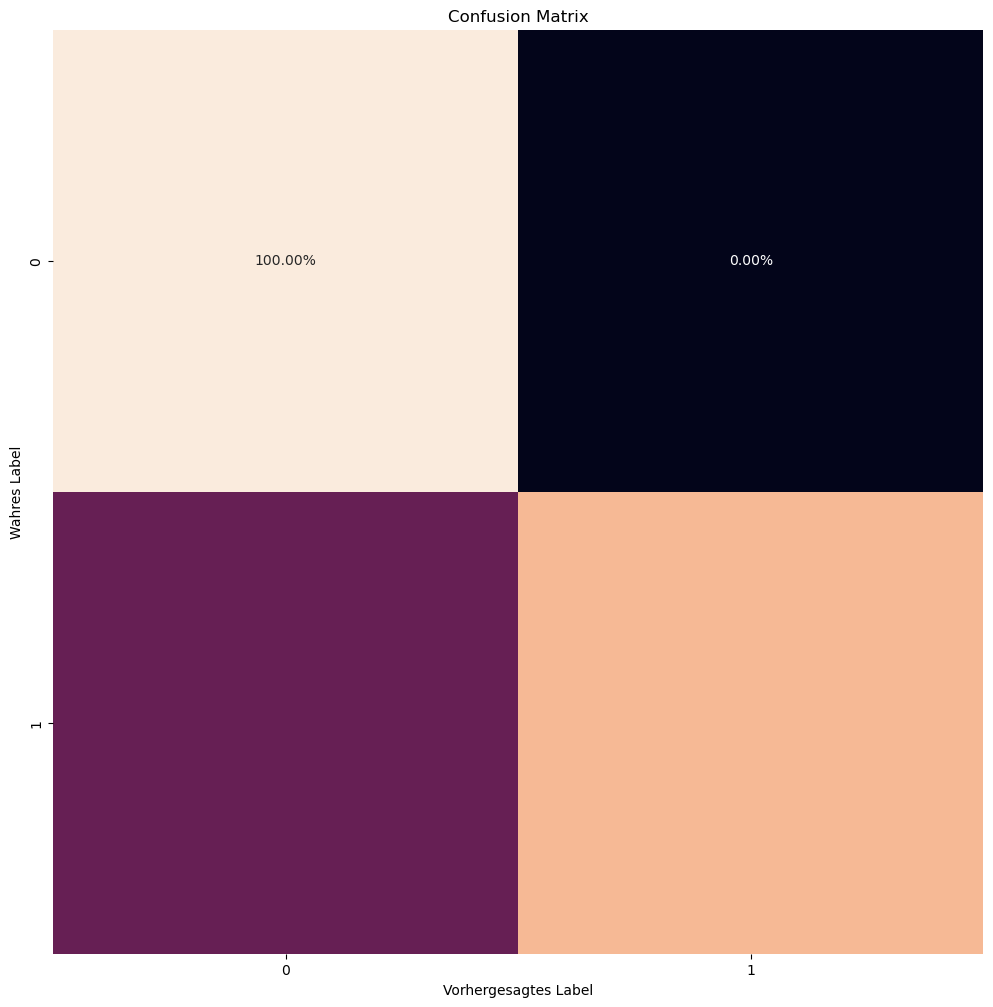

In [74]:
figure = plt.figure(figsize=(12,12))
s=sns.heatmap(c/np.sum(c,axis=1), annot=True,cbar = False,fmt=".2%")
s.set_xlabel("Vorhergesagtes Label")
s.set_ylabel("Wahres Label")
s.set_title("Confusion Matrix")
plt.show()